In [1]:
from faker import Faker
import datetime
import itertools
import numpy as np
import pandas as pd

import os
import datetime
import time
import random

# For plotting
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Faker.seed(0)
fake = Faker()

In [3]:
def generate_customer_profiles_table(n_customers, random_state=0):
    
    np.random.seed(random_state)
        
    customer_id_properties=[]
    
    # Generate customer properties from random distributions 
    for customer_id in range(n_customers):
        
        x_customer_id = np.random.uniform(0,100)
        y_customer_id = np.random.uniform(0,100)
        
        mean_amount = np.random.uniform(5,100) # Arbitrary (but sensible) value 
        std_amount = mean_amount/2 # Arbitrary (but sensible) value
        
        mean_nb_tx_per_day = np.random.uniform(0,2) # Arbitrary (but sensible) value 
        
        card_no = fake.credit_card_number()
        card_type = fake.credit_card_provider()
        email_domain = fake.ascii_email().split("@")[1]
        ip_address = fake.ipv4()
        phone_no = fake.phone_number()
        #product_type = np.random.choice(['45', 'AB', 'L', 'Y', 'T'])
        
        customer_id_properties.append([customer_id,
                                      x_customer_id, y_customer_id,
                                      mean_amount, std_amount,
                                      mean_nb_tx_per_day,
                                      card_no,  card_type, 
                                       email_domain, ip_address, phone_no])
        
        
    customer_profiles_table = pd.DataFrame(customer_id_properties, columns=['CUSTOMER_ID',
                                                                      'x_customer_id', 'y_customer_id',
                                                                      'mean_amount', 'std_amount',
                                                                      'mean_nb_tx_per_day',
                                                                      'card_no', 'card_type', 
                                                                      'email_domain', 'ip_address','phone_no'])
    
    return customer_profiles_table

In [4]:
n_customers = 5
customer_profiles_table = generate_customer_profiles_table(n_customers, random_state = 0)
customer_profiles_table

,CUSTOMER_ID,x_customer_id,y_customer_id,mean_amount,std_amount,mean_nb_tx_per_day,card_no,card_type,email_domain,ip_address,phone_no
0,0,54.881350,71.518937,62.262521,31.131260,1.089766,6504876475938248,VISA 16 digit,collins.com,218.144.249.195,815.659.3877x8408
1,1,42.365480,64.589411,46.570785,23.285393,1.783546,502060975351,JCB 16 digit,pratt.com,84.123.198.72,714.841.8583x98947
2,2,96.366276,38.344152,80.213879,40.106939,1.057790,2720659342320940,Diners Club / Carte Blanche,mclean.net,145.163.253.79,339.694.7751x59179
3,3,56.804456,92.559664,11.748426,5.874213,0.174259,4330413525601231,Maestro,wilson.com,65.98.126.29,217.300.8691
4,4,2.021840,83.261985,78.924891,39.462446,1.740024,4314562087091634574,JCB 16 digit,moore.com,156.78.223.129,+1-207-698-4564x28071


In [5]:
def generate_sme_profiles_table(n_sme, random_state=0):
    
    np.random.seed(random_state)
        
    sme_id_properties=[]
    
    # Generate SME properties from random distributions 
    for sme_id in range(n_sme):
        
        x_sme_id = np.random.uniform(0,100)
        y_sme_id = np.random.uniform(0,100)
        
        sme_id_properties.append([sme_id,
                                      x_sme_id, y_sme_id])
                                       
    sme_profiles_table = pd.DataFrame(sme_id_properties, columns=['SME_ID', 'x_sme_id', 'y_sme_id'])
    
    return sme_profiles_table

In [6]:
n_sme = 5
sme_profiles_table = generate_sme_profiles_table(n_sme, random_state = 0)
sme_profiles_table

,SME_ID,x_sme_id,y_sme_id
0,0,54.881350,71.518937
1,1,60.276338,54.488318
2,2,42.365480,64.589411
3,3,43.758721,89.177300
4,4,96.366276,38.344152


In [7]:
def get_list_sme_within_radius(customer_profile, x_y_sme, r):
    
    # Position (x,y) of customer as numpy array
    x_y_customer = customer_profile[['x_customer_id','y_customer_id']].values.astype(float)
    
    # Squared difference in coordinates between customer and SME product position
    squared_diff_x_y = np.square(x_y_customer - x_y_sme)
    
    # Sum along rows and compute suared root to get distance
    dist_x_y = np.sqrt(np.sum(squared_diff_x_y, axis=1))
    
    # Get the indices of SMEs which are at a distance less than r
    available_sme = list(np.where(dist_x_y<r)[0])
    
    # Return the list of SME IDs
    return available_sme
    

In [8]:
x_y_sme = sme_profiles_table[['x_sme_id','y_sme_id']].values.astype(float)
# Get the list of SMEs within radius of $50$ for the last customer
get_list_sme_within_radius(customer_profiles_table.iloc[4], x_y_sme=x_y_sme, r=50)

[2, 3]

In [9]:
%%capture

sme_available_to_customer_fig, ax = plt.subplots(figsize=(5,5))

# Plot positions of SMEs
ax.scatter(sme_profiles_table.x_sme_id.values, 
           sme_profiles_table.y_sme_id.values, 
           color='blue', label = 'Position of SMEs')

# Plot position of the last customer
customer_id=4
ax.scatter(customer_profiles_table.iloc[customer_id].x_customer_id, 
           customer_profiles_table.iloc[customer_id].y_customer_id, 
           color='red',label="Position of last customer")

ax.legend(loc = 'upper left', bbox_to_anchor=(1.05, 1))

# Plot the region within a radius of 50 of the last customer
circ = plt.Circle((customer_profiles_table.iloc[customer_id].x_customer_id,
                   customer_profiles_table.iloc[customer_id].y_customer_id), radius=50, color='g', alpha=0.2)
ax.add_patch(circ)

fontsize=15

ax.set_title("Green circle: \n SMEs within a radius of 50 \n of the last customer")
ax.set_xlim([0, 100])
ax.set_ylim([0, 100])
    
ax.set_xlabel('x_sme_id', fontsize=fontsize)
ax.set_ylabel('y_sme_id', fontsize=fontsize)

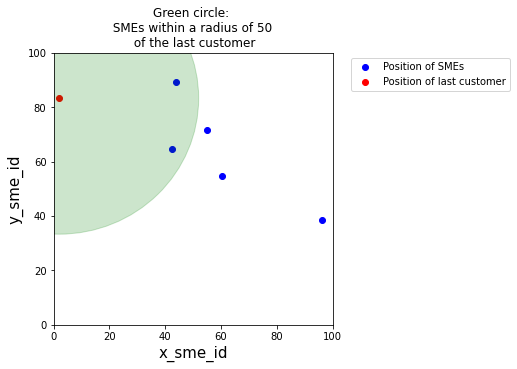

In [10]:
sme_available_to_customer_fig

In [11]:
def generate_transactions_table(customer_profile, start_date = "2018-04-01", nb_days = 10):
    
    customer_transactions = []
    
    random.seed(int(customer_profile.CUSTOMER_ID))
    np.random.seed(int(customer_profile.CUSTOMER_ID))
    
    # For all days
    for day in range(nb_days):
        card_no = customer_profile.card_no
        card_type = customer_profile.card_type
        email_domain = customer_profile.email_domain
        ip_address = customer_profile.ip_address
        phone_no = customer_profile.phone_no
        #product_type = customer_profile.product_type
        
        # Random number of transactions for that day 
        nb_tx = np.random.poisson(customer_profile.mean_nb_tx_per_day)
        
        # If nb_tx positive, let us generate transactions
        if nb_tx>0:
            
            for tx in range(nb_tx):
                
                # Time of transaction: Around noon, std 20000 seconds. This choice aims at simulating the fact that 
                # most transactions occur during the day.
                time_tx = int(np.random.normal(86400/2, 20000))
                
                # If transaction time between 0 and 86400, let us keep it, otherwise, let us discard it
                if (time_tx>0) and (time_tx<86400):
                    
                    # Amount is drawn from a normal distribution  
                    amount = np.random.normal(customer_profile.mean_amount, customer_profile.std_amount)
                    
                    # If amount negative, draw from a uniform distribution
                    if amount<0:
                        amount = np.random.uniform(0,customer_profile.mean_amount*2)
                    
                    amount=np.round(amount,decimals=2)
                    
                    if len(customer_profile.available_sme)>0:
                        
                        sme_id = random.choice(customer_profile.available_sme)
                        
                        
                        # Customers may use different information 
                        if int(np.random.uniform() < 0.04):
                            card_no = fake.credit_card_number()
                            card_type = fake.credit_card_provider()
                        else: 
                            card_no = customer_profile.card_no
                            card_type = customer_profile.card_type

                        if int(np.random.uniform() < 0.1):
                            email_domain = fake.ascii_email().split("@")[1]
                        else:
                            email_domain = customer_profile.email_domain

                        if int(np.random.uniform() < 0.01):
                            ip_address = fake.ipv4()
                        else:
                            ip_address = customer_profile.ip_address

                        if int(np.random.uniform() < 0.02):
                            phone_no = fake.phone_number()
                        else:
                            phone_no = customer_profile.phone_no
                    
                        customer_transactions.append([time_tx+day*86400, day,
                                                      customer_profile.CUSTOMER_ID, 
                                                      sme_id, amount,
                                                      card_no,  card_type, 
                                                      email_domain, ip_address, phone_no])
            
    customer_transactions = pd.DataFrame(customer_transactions, columns=['TX_TIME_SECONDS', 'TX_TIME_DAYS', 'CUSTOMER_ID', 'SME_ID', 'TX_AMOUNT',
                                                                        'CARD_NO', 'CARD_TYPE', 'EMAIL_DOMAIN', 'IP_ADDRESS','PHONE_NO'])
    
    if len(customer_transactions)>0:
        customer_transactions['TX_DATETIME'] = pd.to_datetime(customer_transactions["TX_TIME_SECONDS"], unit='s', origin=start_date)
        customer_transactions=customer_transactions[['TX_DATETIME','CUSTOMER_ID', 'SME_ID', 'TX_AMOUNT','TX_TIME_SECONDS', 'TX_TIME_DAYS',
                                                     'CARD_NO', 'CARD_TYPE', 'EMAIL_DOMAIN', 'IP_ADDRESS','PHONE_NO']]
    
    return customer_transactions  
    
 

In [12]:
def generate_dataset(n_customers = 10000, n_sme = 2000, nb_days=90, start_date="2018-04-01", r=5):
    
    start_time=time.time()
    customer_profiles_table = generate_customer_profiles_table(n_customers, random_state = 0)
    print("Time to generate customer profiles table: {0:.2}s".format(time.time()-start_time))
    
    start_time=time.time()
    sme_profiles_table = generate_sme_profiles_table(n_sme, random_state = 1)
    print("Time to generate sme profiles table: {0:.2}s".format(time.time()-start_time))
    
    start_time=time.time()
    x_y_sme = sme_profiles_table[['x_sme_id','y_sme_id']].values.astype(float)
    customer_profiles_table['available_sme'] = customer_profiles_table.apply(lambda x : get_list_sme_within_radius(x, x_y_sme=x_y_sme, r=r), axis=1)
    # With Pandarallel
    #customer_profiles_table['available_sme'] = customer_profiles_table.parallel_apply(lambda x : get_list_closest_sme(x, x_y_sme=x_y_sme, r=r), axis=1)
    customer_profiles_table['nb_sme']=customer_profiles_table.available_sme.apply(len)
    print("Time to associate sme to customers: {0:.2}s".format(time.time()-start_time))
    
    start_time=time.time()
    transactions_df=customer_profiles_table.groupby('CUSTOMER_ID').apply(lambda x : generate_transactions_table(x.iloc[0], nb_days=nb_days)).reset_index(drop=True)
    # With Pandarallel
    #transactions_df=customer_profiles_table.groupby('CUSTOMER_ID').parallel_apply(lambda x : generate_transactions_table(x.iloc[0], nb_days=nb_days)).reset_index(drop=True)
    print("Time to generate transactions: {0:.2}s".format(time.time()-start_time))
    
    # Sort transactions chronologically
    transactions_df=transactions_df.sort_values('TX_DATETIME')
    # Reset indices, starting from 0
    transactions_df.reset_index(inplace=True,drop=True)
    transactions_df.reset_index(inplace=True)
    # TRANSACTION_ID are the dataframe indices, starting from 0
    transactions_df.rename(columns = {'index':'TRANSACTION_ID'}, inplace = True)
    
    return (customer_profiles_table, sme_profiles_table, transactions_df)
    

In [18]:
(customer_profiles_table, sme_profiles_table, transactions_df)=\
    generate_dataset(n_customers = 10000, 
                     n_sme = 4000, 
                     nb_days=183, 
                     start_date="2018-04-01", 
                     r=5)

Time to generate customer profiles table: 3.4s
Time to generate sme profiles table: 0.026s
Time to associate sme to customers: 4.0s
Time to generate transactions: 3.6e+02s


In [19]:
%%capture

distribution_amount_times_fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = transactions_df[transactions_df.TX_TIME_DAYS<10]['TX_AMOUNT'].sample(n=1000).values
time_val = transactions_df[transactions_df.TX_TIME_DAYS<10]['TX_TIME_SECONDS'].sample(n=1000).values

sns.distplot(amount_val, ax=ax[0], color='r', hist = True, kde = False)
ax[0].set_title('Distribution of transaction amounts', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])
ax[0].set(xlabel = "Amount", ylabel="Number of transactions")

# We divide the time variables by 86400 to transform seconds to days in the plot
sns.distplot(time_val/86400, ax=ax[1], color='b', bins = 100, hist = True, kde = False)
ax[1].set_title('Distribution of transaction times', fontsize=14)
ax[1].set_xlim([min(time_val/86400), max(time_val/86400)])
ax[1].set_xticks(range(10))
ax[1].set(xlabel = "Time (days)", ylabel="Number of transactions")

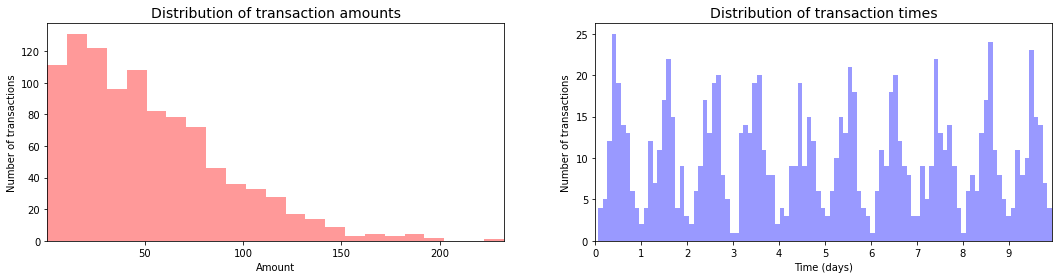

In [20]:
distribution_amount_times_fig

In [21]:
def add_frauds(customer_profiles_table, sme_profiles_table, transactions_df, random_state=1):
    
    random.seed(random_state)
    
    # By default, all transactions are genuine
    transactions_df['TX_FRAUD']=0
    
    # Scenario 1
    for idx, row in transactions_df.iterrows():
        tx_amount = row["TX_AMOUNT"]
        if tx_amount>300:
            transactions_df.loc[idx,'TX_FRAUD'] = int(np.random.uniform() < 0.2)
    nb_frauds_scenario_1=transactions_df.TX_FRAUD.sum()
    print("Number of frauds from scenario 1: "+str(nb_frauds_scenario_1))
    
    
    # Scenario 2
    for day in range(transactions_df.TX_TIME_DAYS.max()):
        if int(np.random.uniform() < 0.3):
            compromised_customers = customer_profiles_table.CUSTOMER_ID.sample(n=3, random_state=day).values

            compromised_transactions=transactions_df[(transactions_df.TX_TIME_DAYS>=day) & 
                                                        (transactions_df.TX_TIME_DAYS<day+14) & 
                                                        (transactions_df.CUSTOMER_ID.isin(compromised_customers))]

            nb_compromised_transactions=len(compromised_transactions)


            random.seed(day)
            index_fauds = random.sample(list(compromised_transactions.index.values),k=int(nb_compromised_transactions/3))

            transactions_df.loc[index_fauds,'TX_AMOUNT']=transactions_df.loc[index_fauds,'TX_AMOUNT']*5
            transactions_df.loc[index_fauds,'TX_FRAUD']=1
                             
    nb_frauds_scenario_2=transactions_df.TX_FRAUD.sum()-nb_frauds_scenario_1
    print("Number of frauds from scenario 2: "+str(nb_frauds_scenario_2))
    
    
    # Scenario 3
    for idx, row in transactions_df.iterrows():
        card_no, card_type, email, ip_address, phone_no = str(row["CARD_NO"]), row["CARD_TYPE"], row["EMAIL_DOMAIN"], str(row["IP_ADDRESS"]), str(row["PHONE_NO"])
        
        if email in ["hotmail.com", "gmail.com", "yahoo.com"]:
            if (phone_no != "nan") and (phone_no.endswith("16") or phone_no.endswith("78") or phone_no.endswith("23")):
                transactions_df.loc[idx,'TX_FRAUD']=int(np.random.uniform() < 0.05)
            else:
                transactions_df.loc[idx,'TX_FRAUD']=int(np.random.uniform() < 0.001)
        else:
            if card_type in ["Diners Club / Carte Blanche", "JCB 15 digit", "Maestro"]: # about 35,000 observations are in this categires
                if (card_no.endswith("001") or card_no.endswith("002") or card_no.endswith("003") or card_no.endswith("004") or card_no.endswith("005") or card_no.endswith("007") or card_no.endswith("008") or card_no.endswith("009")): 
                    transactions_df.loc[idx,'TX_FRAUD']=int(np.random.uniform() < 0.1)
                else:
                    if (ip_address != "nan") and (ip_address.endswith(".227") or ip_address.endswith(".104") or ip_address.endswith(".251") or ip_address.endswith(".181")):
                        transactions_df.loc[idx,'TX_FRAUD']=int(np.random.uniform() < 0.05)
                    else:
                        transactions_df.loc[idx,'TX_FRAUD']=int(np.random.uniform() < 0.05)
            else:
                transactions_df.loc[idx,'TX_FRAUD']=int(np.random.uniform() < 0.00001)
    
    nb_frauds_scenario_3=transactions_df.TX_FRAUD.sum()-nb_frauds_scenario_2-nb_frauds_scenario_1
    print("Number of frauds from scenario 3: "+str(nb_frauds_scenario_3))
    
    
    return transactions_df                 

In [22]:
%time transactions_df = add_frauds(customer_profiles_table, sme_profiles_table, transactions_df)

Number of frauds from scenario 1: 0
Number of frauds from scenario 2: 727
Number of frauds from scenario 3: 12440
CPU times: total: 2min 37s
Wall time: 4min 57s


In [23]:
transactions_df.TX_FRAUD.mean()

0.007422552789926028

In [24]:
transactions_df.TX_FRAUD.sum()

13167

# Generate Fraud

In [25]:
def generate_customer_profiles_table_fraud(n_customers,normal_customer_no,random_state=1):
    
    np.random.seed(random_state)
        
    customer_id_properties=[]
    
    # Generate customer properties from random distributions 
    for customer_id in range(n_customers):
        
        x_customer_id = np.random.uniform(0,100)
        y_customer_id = np.random.uniform(0,100)
        
        mean_amount = np.random.uniform(5,100) # Arbitrary (but sensible) value 
        std_amount = mean_amount/2 # Arbitrary (but sensible) value
        
        mean_nb_tx_per_day = np.random.uniform(0,2) # Arbitrary (but sensible) value 
        
        card_no = fake.credit_card_number()
        card_type = fake.credit_card_provider()
        email_domain = fake.ascii_email().split("@")[1]
        ip_address = fake.ipv4()
        phone_no = fake.phone_number()
        #product_type = np.random.choice(['45', 'AB', 'L', 'Y', 'T'])
        
        customer_id_properties.append([customer_id + normal_customer_no,
                                      x_customer_id, y_customer_id,
                                      mean_amount, std_amount,
                                      mean_nb_tx_per_day,
                                      card_no,  card_type, 
                                       email_domain, ip_address, phone_no])
        
        
    customer_profiles_table_fraud = pd.DataFrame(customer_id_properties, columns=['CUSTOMER_ID',
                                                                      'x_customer_id', 'y_customer_id',
                                                                      'mean_amount', 'std_amount',
                                                                      'mean_nb_tx_per_day',
                                                                      'card_no', 'card_type', 
                                                                      'email_domain', 'ip_address','phone_no'])
    
    return customer_profiles_table_fraud

In [26]:
n_customers = 5
customer_profiles_table_fraud = generate_customer_profiles_table_fraud(n_customers,customer_profiles_table.shape[0],random_state = 0)
customer_profiles_table_fraud

,CUSTOMER_ID,x_customer_id,y_customer_id,mean_amount,std_amount,mean_nb_tx_per_day,card_no,card_type,email_domain,ip_address,phone_no
0,10000,54.881350,71.518937,62.262521,31.131260,1.089766,3568154666712370,VISA 16 digit,gmail.com,200.124.194.38,+1-209-869-0586x39387
1,10001,42.365480,64.589411,46.570785,23.285393,1.783546,213182732817811,VISA 19 digit,yahoo.com,220.85.203.219,001-157-949-0818
2,10002,96.366276,38.344152,80.213879,40.106939,1.057790,4409722396816009,Discover,hotmail.com,197.19.82.209,(160)911-0894
3,10003,56.804456,92.559664,11.748426,5.874213,0.174259,676332560199,VISA 19 digit,hotmail.com,159.238.249.212,(786)149-1321
4,10004,2.021840,83.261985,78.924891,39.462446,1.740024,5544619857127137,VISA 19 digit,taylor-smith.net,152.255.144.125,001-314-089-6489


In [27]:
def get_list_sme_without_radius(customer_profile, sme_profiles, n_sme, r, random_state=1):
    
    np.random.seed(random_state)
    
    sme_profiles_sample = sme_profiles.sample(n_sme)
    
    x_y_sme = sme_profiles_sample[['x_sme_id','y_sme_id']].values.astype(float)
    
    # Position (x,y) of customer as numpy array
    x_y_customer = customer_profile[['x_customer_id','y_customer_id']].values.astype(float)
    
    # Squared difference in coordinates between customer and SME product position
    squared_diff_x_y = np.square(x_y_customer - x_y_sme)
    
    # Sum along rows and compute suared root to get distance
    dist_x_y = np.sqrt(np.sum(squared_diff_x_y, axis=1))
    
    # Get the indices of SMEs which are at a distance larger than r
    out_sme = list(sme_profiles_sample.iloc[np.where(dist_x_y>r)[0],0])
    
    # Return the list of SME IDs
    return out_sme
    

In [37]:
# x_y_sme = sme_profiles_table_fraud[['x_sme_id','y_sme_id']].values.astype(float)
# Get the list of SMEs without radius of $50$ for the last customer
sme_fraud = get_list_sme_without_radius(customer_profiles_table_fraud.iloc[4], sme_profiles_table, n_sme=20, r=50)

In [29]:
customer_profiles_table_fraud['out_sme']=customer_profiles_table_fraud.apply(lambda x : get_list_sme_without_radius(x, sme_profiles_table, n_sme=20, r=50), axis=1)

In [38]:
%%capture

sme_out_of_customer_fig, ax = plt.subplots(figsize=(5,5))

# Plot positions of SMEs
ax.scatter(sme_profiles_table.loc[sme_fraud,'x_sme_id'].values, 
           sme_profiles_table.loc[sme_fraud,'y_sme_id'].values, 
           color='blue', label = 'Position of SMEs')

# Plot position of the last customer
customer_id=4
ax.scatter(customer_profiles_table_fraud.iloc[customer_id].x_customer_id, 
           customer_profiles_table_fraud.iloc[customer_id].y_customer_id, 
           color='red',label="Position of last customer")

ax.legend(loc = 'upper left', bbox_to_anchor=(1.05, 1))

# Plot the region within a radius of 50 of the last customer
circ = plt.Circle((customer_profiles_table_fraud.iloc[customer_id].x_customer_id,
                   customer_profiles_table_fraud.iloc[customer_id].y_customer_id), radius=50, color='grey', alpha=0.2)
ax.add_patch(circ)

fontsize=15

ax.set_title("Green circle: \n SMEs within a radius of 50 \n of the last customer")
ax.set_xlim([0, 100])
ax.set_ylim([0, 100])
    
ax.set_xlabel('x_sme_id', fontsize=fontsize)
ax.set_ylabel('y_sme_id', fontsize=fontsize)

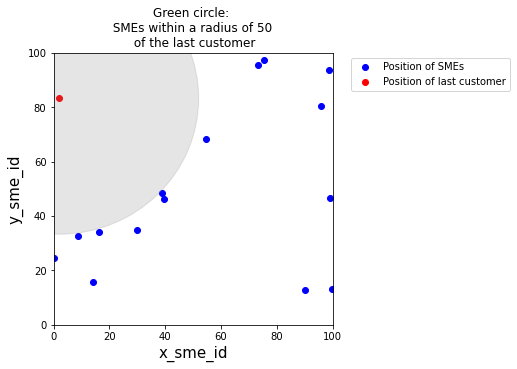

In [39]:
sme_out_of_customer_fig

In [32]:
def generate_transactions_table_fraud(customer_profile, start_date = "2018-04-01", nb_days = 100, fraud_days=random.randint(0,20), random_state=1):
   
    np.random.seed(random_state)
    
    customer_transactions_fraud = []
    
    random.seed(int(customer_profile.CUSTOMER_ID))
    np.random.seed(int(customer_profile.CUSTOMER_ID))
    
    fraud_days_start = random.randint(0,183-fraud_days)
    
    # For all fraud_days
    for day in range(fraud_days):       
    
        # many payments: 2 to 6 times of the normal number of transactions for that day 
        nb_tx = np.random.poisson(customer_profile.mean_nb_tx_per_day)*int(np.random.uniform(2,6))
        
        # If nb_tx positive, let us generate transactions
        if nb_tx>0:
            
            for tx in range(nb_tx):
                
                # Time of transaction: Around noon, std 20000 seconds. This choice aims at simulating the fact that 
                # most transactions occur during the day.
                time_tx = int(np.random.normal(86400/2, 20000))
                
                # If transaction time between 0 and 86400, let us keep it, otherwise, let us discard it
                if (time_tx>0) and (time_tx<86400):
                    
                    # Amount is drawn from a normal distribution  
                    amount = np.random.normal(customer_profile.mean_amount, customer_profile.std_amount)
                    
                    # If amount negative, draw from a uniform distribution
                    if amount<0:
                        amount = np.random.uniform(0,customer_profile.mean_amount*2)
                    
                    amount=np.round(amount,decimals=2)
                    
                    if len(customer_profile.out_sme)>0:
                        
                        sme_id = random.choice(customer_profile.out_sme)
                        
                        # for each payment, the information is changed, for example:
                            #1 The same card but different shipping addresses.
                            #2 Many cards that use the same shipping address.
                            #3 The same card from the same IP address.
                            #4 The same customer name/email address.

                        if int(np.random.uniform() < 0.5):
                            card_no = fake.credit_card_number()
                            card_type = fake.credit_card_provider()
                        else: 
                            card_no = customer_profile.card_no
                            card_type = customer_profile.card_type

                        if int(np.random.uniform() < 0.5):
                            email_domain = fake.ascii_email().split("@")[1]
                        else:
                            email_domain = customer_profile.email_domain

                        if int(np.random.uniform() < 0.5):
                            ip_address = fake.ipv4()
                        else:
                            ip_address = customer_profile.ip_address

                        if int(np.random.uniform() < 0.5):
                            phone_no = fake.phone_number()
                        else:
                            phone_no = customer_profile.phone_no

                        customer_transactions_fraud.append([time_tx+day*86400, day,
                                                      customer_profile.CUSTOMER_ID, 
                                                      sme_id, amount,
                                                      card_no,  card_type, 
                                                      email_domain, ip_address, phone_no])
            
    customer_transactions_fraud = pd.DataFrame(customer_transactions_fraud, columns=['TX_TIME_SECONDS', 'TX_TIME_DAYS', 'CUSTOMER_ID', 'SME_ID', 'TX_AMOUNT',
                                                                        'CARD_NO', 'CARD_TYPE', 'EMAIL_DOMAIN', 'IP_ADDRESS','PHONE_NO'])
    
    if len(customer_transactions_fraud)>0:
        customer_transactions_fraud['TX_DATETIME'] = pd.to_datetime(customer_transactions_fraud["TX_TIME_SECONDS"], unit='s', origin=start_date)+pd.DateOffset(days=fraud_days_start)
        customer_transactions_fraud = customer_transactions_fraud[['TX_DATETIME','CUSTOMER_ID', 'SME_ID', 'TX_AMOUNT','TX_TIME_SECONDS', 'TX_TIME_DAYS',
                                                     'CARD_NO', 'CARD_TYPE', 'EMAIL_DOMAIN', 'IP_ADDRESS','PHONE_NO']]
    
    return customer_transactions_fraud
    
 

In [43]:
def generate_dataset_fraud(n_customers = 100, n_sme = 20, nb_days=90, start_date="2018-04-01",fraud_days=random.randint(0,20), r=5, 
                           tx_no=transactions_df.shape[0],normal_customer_no=customer_profiles_table.shape[0], sme_profiles=sme_profiles_table):
    
    start_time=time.time()
    customer_profiles_table_fraud = generate_customer_profiles_table_fraud(n_customers,normal_customer_no,random_state = 1)
    print("Time to generate customer profiles table: {0:.2}s".format(time.time()-start_time))
        
    start_time=time.time()
    customer_profiles_table_fraud['out_sme'] = customer_profiles_table_fraud.apply(lambda x : get_list_sme_without_radius(x, sme_profiles, n_sme=n_sme, r=r,  random_state=1), axis=1)
  
    customer_profiles_table_fraud['nb_sme']=customer_profiles_table_fraud.out_sme.apply(len)
    print("Time to associate sme to customers: {0:.2}s".format(time.time()-start_time))
    
    start_time=time.time()
    transactions_df_fraud=customer_profiles_table_fraud.groupby('CUSTOMER_ID').apply(lambda x : generate_transactions_table_fraud(x.iloc[0], nb_days=nb_days, fraud_days=fraud_days,random_state=1)).reset_index(drop=True)
    
    print("Time to generate transactions: {0:.2}s".format(time.time()-start_time))
    
    # Sort transactions chronologically
    transactions_df_fraud=transactions_df_fraud.sort_values(by=['TX_DATETIME'])
    # Reset indices, starting from 0
    transactions_df_fraud.reset_index(inplace=True,drop=True)
    transactions_df_fraud.reset_index(inplace=True)
    # TRANSACTION_ID are the dataframe indices, starting from the last transaction id of the normal one.
    transactions_df_fraud.rename(columns = {'index':'TRANSACTION_ID'}, inplace = True)
    transactions_df_fraud.TRANSACTION_ID += tx_no
    
    transactions_df_fraud['TX_FRAUD']=1
    
    transactions_df_fraud=transactions_df_fraud[['TRANSACTION_ID', 'TX_DATETIME','CUSTOMER_ID', 'SME_ID', 'TX_AMOUNT','TX_TIME_SECONDS', 'TX_TIME_DAYS',
                                                     'CARD_NO', 'CARD_TYPE', 'EMAIL_DOMAIN', 'IP_ADDRESS','PHONE_NO','TX_FRAUD']]
    
    return (customer_profiles_table_fraud, transactions_df_fraud)

    

In [44]:
(customer_profiles_table_fraud, transactions_df_fraud)=\
    generate_dataset_fraud(n_customers = 100, 
                     n_sme = 200, 
                     nb_days=183, 
                     start_date="2018-04-01", 
                     fraud_days=random.randint(0,20),
                     r=5,
                     tx_no=transactions_df.shape[0],
                     normal_customer_no=customer_profiles_table.shape[0], 
                     sme_profiles=sme_profiles_table)

Time to generate customer profiles table: 0.035s
Time to associate sme to customers: 0.12s
Time to generate transactions: 2.4s


In [45]:
transactions_df_total = pd.concat([transactions_df, transactions_df_fraud]).sort_values(by=['TX_DATETIME'])
transactions_df_total.reset_index(drop=True, inplace=True)
transactions_df_total

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,SME_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,CARD_NO,CARD_TYPE,EMAIL_DOMAIN,IP_ADDRESS,PHONE_NO,TX_FRAUD
0,0,2018-04-01 00:00:17,6160,1602,31.83,17,0,4807386282223131022,VISA 16 digit,smith.com,93.113.29.137,+1-684-043-2108x883,0
1,1,2018-04-01 00:01:59,3305,3563,66.21,119,0,501840408188,JCB 16 digit,yahoo.com,213.50.161.243,+1-435-580-2880x863,0
2,2,2018-04-01 00:02:21,6170,3552,25.17,141,0,2404180621851474,JCB 15 digit,yahoo.com,124.3.159.126,601-185-2008,0
3,3,2018-04-01 00:03:45,8347,344,3.09,225,0,38977833740025,JCB 15 digit,gmail.com,140.252.121.231,+1-287-916-9827x7383,0
4,4,2018-04-01 00:07:56,2,3958,146.0,476,0,4934421761046,Diners Club / Carte Blanche,wiggins.com,77.42.198.63,+1-485-590-9776x58236,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1781237,1773913,2018-09-30 23:56:56,1987,324,34.53,15811016,182,3528716375376223,JCB 16 digit,hughes.info,134.142.234.159,+1-436-476-9444x0036,0
1781238,1773914,2018-09-30 23:57:07,3133,3491,55.83,15811027,182,676151026702,American Express,yahoo.com,20.231.206.121,(405)305-0411x8725,0
1781239,1773915,2018-09-30 23:57:11,3007,3664,65.94,15811031,182,4264830832653,VISA 16 digit,torres.net,182.201.70.209,200-540-6960x0861,0
1781240,1773916,2018-09-30 23:57:44,6244,3137,16.99,15811064,182,213165348311865,Maestro,gmail.com,177.38.229.155,425-178-0631x3652,0


# Baseline transform

In [46]:
def is_weekend(tx_datetime):
    
    # Transform date into weekday (0 is Monday, 6 is Sunday)
    weekday = tx_datetime.weekday()
    # Binary value: 0 if weekday, 1 if weekend
    is_weekend = weekday>=5
    
    return int(is_weekend)

In [47]:
%time transactions_df_total['TX_DURING_WEEKEND']=transactions_df_total.TX_DATETIME.apply(is_weekend)

CPU times: total: 2.08 s
Wall time: 2.98 s


In [48]:
def is_night(tx_datetime):
    
    # Get the hour of the transaction
    tx_hour = tx_datetime.hour
    # Binary value: 1 if hour less than 6, and 0 otherwise
    is_night = tx_hour<=6
    
    return int(is_night)

In [49]:
%time transactions_df_total['TX_DURING_NIGHT']=transactions_df_total.TX_DATETIME.apply(is_night)

CPU times: total: 1.47 s
Wall time: 2.38 s


In [50]:
def get_customer_spending_behaviour_features(customer_transactions, windows_size_in_days=[1,7,30]):
    
    # Let us first order transactions chronologically
    customer_transactions=customer_transactions.sort_values('TX_DATETIME')
    
    # The transaction date and time is set as the index, which will allow the use of the rolling function 
    customer_transactions.index=customer_transactions.TX_DATETIME
    
    # For each window size
    for window_size in windows_size_in_days:
        
        # Compute the sum of the transaction amounts and the number of transactions for the given window size
        SUM_AMOUNT_TX_WINDOW=customer_transactions['TX_AMOUNT'].rolling(str(window_size)+'d').sum()
        NB_TX_WINDOW=customer_transactions['TX_AMOUNT'].rolling(str(window_size)+'d').count()
    
        # Compute the average transaction amount for the given window size
        # NB_TX_WINDOW is always >0 since current transaction is always included
        AVG_AMOUNT_TX_WINDOW=SUM_AMOUNT_TX_WINDOW / NB_TX_WINDOW
    
        # Save feature values
        customer_transactions['CUSTOMER_ID_NB_TX_'+str(window_size)+'DAY_WINDOW']=list(NB_TX_WINDOW)
        customer_transactions['CUSTOMER_ID_AVG_AMOUNT_'+str(window_size)+'DAY_WINDOW']=list(AVG_AMOUNT_TX_WINDOW)
    
    # Reindex according to transaction IDs
    customer_transactions.index=customer_transactions.TRANSACTION_ID
        
    # And return the dataframe with the new features
    return customer_transactions

In [51]:
%time transactions_df_total=transactions_df_total.groupby('CUSTOMER_ID').apply(lambda x: get_customer_spending_behaviour_features(x, windows_size_in_days=[1,7,30]))
transactions_df_total=transactions_df_total.sort_values('TX_DATETIME').reset_index(drop=True)

CPU times: total: 31.1 s
Wall time: 48.6 s


In [52]:
def get_count_risk_rolling_window(sme_transactions, delay_period=7, windows_size_in_days=[1,7,30], feature="SME_ID"):
    
    sme_transactions=sme_transactions.sort_values('TX_DATETIME')
    
    sme_transactions.index=sme_transactions.TX_DATETIME
    
    NB_FRAUD_DELAY=sme_transactions['TX_FRAUD'].rolling(str(delay_period)+'d').sum()
    NB_TX_DELAY=sme_transactions['TX_FRAUD'].rolling(str(delay_period)+'d').count()
    
    for window_size in windows_size_in_days:
    
        NB_FRAUD_DELAY_WINDOW=sme_transactions['TX_FRAUD'].rolling(str(delay_period+window_size)+'d').sum()
        NB_TX_DELAY_WINDOW=sme_transactions['TX_FRAUD'].rolling(str(delay_period+window_size)+'d').count()
    
        NB_FRAUD_WINDOW = NB_FRAUD_DELAY_WINDOW-NB_FRAUD_DELAY
        NB_TX_WINDOW = NB_TX_DELAY_WINDOW-NB_TX_DELAY
    
        RISK_WINDOW = NB_FRAUD_WINDOW/NB_TX_WINDOW
        
        sme_transactions[feature+'_NB_TX_'+str(window_size)+'DAY_WINDOW']=list(NB_TX_WINDOW)
        sme_transactions[feature+'_RISK_'+str(window_size)+'DAY_WINDOW']=list(RISK_WINDOW)
        
    sme_transactions.index=sme_transactions.TRANSACTION_ID
    
    # Replace NA values with 0 (all undefined risk scores where NB_TX_WINDOW is 0) 
    sme_transactions.fillna(0,inplace=True)
    
    return sme_transactions

In [53]:
%time transactions_df_total=transactions_df_total.groupby('SME_ID').apply(lambda x: get_count_risk_rolling_window(x, delay_period=7, windows_size_in_days=[1,7,30], feature="TERMINAL_ID"))
transactions_df_total=transactions_df_total.sort_values('TX_DATETIME').reset_index(drop=True)

CPU times: total: 19.2 s
Wall time: 39 s


In [54]:
def sum_category(transaction_profiles):
    for col in ["CARD_NO","CARD_TYPE","EMAIL_DOMAIN","IP_ADDRESS","PHONE_NO"]:
        transaction_profiles["NB_"+col] = len(set(transaction_profiles[col]))
    return transaction_profiles
    

In [55]:
%time transactions_df_total = transactions_df_total.groupby('CUSTOMER_ID').apply(sum_category).reset_index(drop=True)

CPU times: total: 9 s
Wall time: 18.7 s


In [56]:
output_feature="TX_FRAUD"

input_features=['TX_AMOUNT','TX_DURING_WEEKEND', 'TX_DURING_NIGHT', 'CUSTOMER_ID_NB_TX_1DAY_WINDOW',
       'CUSTOMER_ID_AVG_AMOUNT_1DAY_WINDOW', 'CUSTOMER_ID_NB_TX_7DAY_WINDOW',
       'CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW', 'CUSTOMER_ID_NB_TX_30DAY_WINDOW',
       'CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW', 'TERMINAL_ID_NB_TX_1DAY_WINDOW',
       'TERMINAL_ID_RISK_1DAY_WINDOW', 'TERMINAL_ID_NB_TX_7DAY_WINDOW',
       'TERMINAL_ID_RISK_7DAY_WINDOW', 'TERMINAL_ID_NB_TX_30DAY_WINDOW',
       'TERMINAL_ID_RISK_30DAY_WINDOW', 'NB_CARD_NO', 'NB_CARD_TYPE', 'NB_EMAIL_DOMAIN', 'NB_IP_ADDRESS',
       'NB_PHONE_NO']

In [57]:
transactions_xgb = pd.DataFrame()
transactions_xgb[input_features] = transactions_df_total[input_features]
# Performing logarithmic transformation for transaction amount.
transactions_xgb.TX_AMOUNT.apply(np.log10)
display(transactions_xgb)

,TX_AMOUNT,TX_DURING_WEEKEND,TX_DURING_NIGHT,CUSTOMER_ID_NB_TX_1DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_1DAY_WINDOW,CUSTOMER_ID_NB_TX_7DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW,CUSTOMER_ID_NB_TX_30DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW,TERMINAL_ID_NB_TX_1DAY_WINDOW,TERMINAL_ID_RISK_1DAY_WINDOW,TERMINAL_ID_NB_TX_7DAY_WINDOW,TERMINAL_ID_RISK_7DAY_WINDOW,TERMINAL_ID_NB_TX_30DAY_WINDOW,TERMINAL_ID_RISK_30DAY_WINDOW,NB_CARD_NO,NB_CARD_TYPE,NB_EMAIL_DOMAIN,NB_IP_ADDRESS,NB_PHONE_NO
0,31.83,1,1,1.0,31.830000,1.0,31.830000,1.0,31.830000,0.0,0.0,0.0,0.0,0.0,0.000000,10,6,15,3,3
1,66.21,1,1,1.0,66.210000,1.0,66.210000,1.0,66.210000,0.0,0.0,0.0,0.0,0.0,0.000000,5,3,17,2,7
2,25.17,1,1,1.0,25.170000,1.0,25.170000,1.0,25.170000,0.0,0.0,0.0,0.0,0.0,0.000000,12,7,19,6,7
3,3.09,1,1,1.0,3.090000,1.0,3.090000,1.0,3.090000,0.0,0.0,0.0,0.0,0.0,0.000000,5,4,7,1,2
4,146.00,1,1,1.0,146.000000,1.0,146.000000,1.0,146.000000,0.0,0.0,0.0,0.0,0.0,0.000000,6,4,12,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1781237,34.53,1,0,1.0,34.530000,5.0,61.300000,41.0,56.118293,4.0,0.0,28.0,0.0,105.0,0.000000,10,6,11,8,5
1781238,55.83,1,0,2.0,46.775000,19.0,53.013158,49.0,51.493673,4.0,0.0,17.0,0.0,77.0,0.025974,10,6,15,3,9
1781239,65.94,1,0,3.0,48.753333,12.0,69.355833,41.0,80.544878,4.0,0.0,17.0,0.0,61.0,0.000000,15,7,20,4,3
1781240,16.99,1,0,7.0,42.022857,11.0,43.820909,38.0,50.416316,2.0,0.0,11.0,0.0,63.0,0.000000,8,6,20,2,5


In [58]:
X_train = transactions_xgb.copy()
y_train = transactions_df_total[output_feature].copy()
cols = list(X_train.columns)
display(X_train, y_train,cols)

,TX_AMOUNT,TX_DURING_WEEKEND,TX_DURING_NIGHT,CUSTOMER_ID_NB_TX_1DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_1DAY_WINDOW,CUSTOMER_ID_NB_TX_7DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW,CUSTOMER_ID_NB_TX_30DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW,TERMINAL_ID_NB_TX_1DAY_WINDOW,TERMINAL_ID_RISK_1DAY_WINDOW,TERMINAL_ID_NB_TX_7DAY_WINDOW,TERMINAL_ID_RISK_7DAY_WINDOW,TERMINAL_ID_NB_TX_30DAY_WINDOW,TERMINAL_ID_RISK_30DAY_WINDOW,NB_CARD_NO,NB_CARD_TYPE,NB_EMAIL_DOMAIN,NB_IP_ADDRESS,NB_PHONE_NO
0,31.83,1,1,1.0,31.830000,1.0,31.830000,1.0,31.830000,0.0,0.0,0.0,0.0,0.0,0.000000,10,6,15,3,3
1,66.21,1,1,1.0,66.210000,1.0,66.210000,1.0,66.210000,0.0,0.0,0.0,0.0,0.0,0.000000,5,3,17,2,7
2,25.17,1,1,1.0,25.170000,1.0,25.170000,1.0,25.170000,0.0,0.0,0.0,0.0,0.0,0.000000,12,7,19,6,7
3,3.09,1,1,1.0,3.090000,1.0,3.090000,1.0,3.090000,0.0,0.0,0.0,0.0,0.0,0.000000,5,4,7,1,2
4,146.00,1,1,1.0,146.000000,1.0,146.000000,1.0,146.000000,0.0,0.0,0.0,0.0,0.0,0.000000,6,4,12,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1781237,34.53,1,0,1.0,34.530000,5.0,61.300000,41.0,56.118293,4.0,0.0,28.0,0.0,105.0,0.000000,10,6,11,8,5
1781238,55.83,1,0,2.0,46.775000,19.0,53.013158,49.0,51.493673,4.0,0.0,17.0,0.0,77.0,0.025974,10,6,15,3,9
1781239,65.94,1,0,3.0,48.753333,12.0,69.355833,41.0,80.544878,4.0,0.0,17.0,0.0,61.0,0.000000,15,7,20,4,3
1781240,16.99,1,0,7.0,42.022857,11.0,43.820909,38.0,50.416316,2.0,0.0,11.0,0.0,63.0,0.000000,8,6,20,2,5


0          0
1          0
2          0
3          0
4          0
          ..
1781237    0
1781238    0
1781239    0
1781240    0
1781241    0
Name: TX_FRAUD, Length: 1781242, dtype: int64

['TX_AMOUNT',
 'TX_DURING_WEEKEND',
 'TX_DURING_NIGHT',
 'CUSTOMER_ID_NB_TX_1DAY_WINDOW',
 'CUSTOMER_ID_AVG_AMOUNT_1DAY_WINDOW',
 'CUSTOMER_ID_NB_TX_7DAY_WINDOW',
 'CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW',
 'CUSTOMER_ID_NB_TX_30DAY_WINDOW',
 'CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW',
 'TERMINAL_ID_NB_TX_1DAY_WINDOW',
 'TERMINAL_ID_RISK_1DAY_WINDOW',
 'TERMINAL_ID_NB_TX_7DAY_WINDOW',
 'TERMINAL_ID_RISK_7DAY_WINDOW',
 'TERMINAL_ID_NB_TX_30DAY_WINDOW',
 'TERMINAL_ID_RISK_30DAY_WINDOW',
 'NB_CARD_NO',
 'NB_CARD_TYPE',
 'NB_EMAIL_DOMAIN',
 'NB_IP_ADDRESS',
 'NB_PHONE_NO']

In [59]:
# extract out transactions for train, validation, and test data
train_data_ratio = 0.7 # fraction of data to use in training set
valid_data_ratio = 0.2 # fraction of data to use in validation set
n_train = int(transactions_xgb.shape[0]*train_data_ratio)
n_valid = int(transactions_xgb.shape[0]*(train_data_ratio+valid_data_ratio))
train_ids = transactions_xgb.index.values[:n_train]
valid_ids = transactions_xgb.index.values[n_train:n_valid]
test_ids = transactions_xgb.index.values[n_valid:]
print("Training, validation, and test data fraction are {}, {}, and {:.1f}, respectively".format(train_data_ratio, valid_data_ratio, 1-train_data_ratio-valid_data_ratio))

Training, validation, and test data fraction are 0.7, 0.2, and 0.1, respectively


In [60]:
get_fraud_frac = lambda series: 100 * sum(series)/len(series)
print("Percentage of fraud transactions for train data: {}".format(get_fraud_frac(transactions_df_total.TX_FRAUD[:n_train])))
print("Percentage of fraud transactions for validation data: {}".format(get_fraud_frac(transactions_df_total.TX_FRAUD[n_train:n_valid])))
print("Percentage of fraud transactions for test data: {}".format(get_fraud_frac(transactions_df_total.TX_FRAUD[n_valid:])))
print("Percentage of fraud transactions for all data: {}".format(get_fraud_frac(transactions_df_total.TX_FRAUD)))

Percentage of fraud transactions for train data: 1.167323912937125
Percentage of fraud transactions for validation data: 1.1666030405784735
Percentage of fraud transactions for test data: 0.9992982456140351
Percentage of fraud transactions for all data: 1.1503770964304683


In [61]:
idxT = X_train.index[:n_train]
idxV = X_train.index[n_train:n_valid]

In [62]:
from sklearn.pipeline import Pipeline
from xgboost.sklearn import XGBClassifier
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_selector

In [63]:
import xgboost as xgb
print("XGBoost version:", xgb.__version__)

if True:
    clf = xgb.XGBClassifier( 
        n_estimators=2000,
        max_depth=12, 
        learning_rate=0.02, 
        subsample=0.8,
        colsample_bytree=0.4, 
        missing=-1, 
        eval_metric='auc',
        # USE CPU
        #nthread=4,
        #tree_method='hist' 
        # USE GPU
        tree_method='gpu_hist' 
    )
    h = clf.fit(X_train.loc[idxT,cols], y_train.loc[idxT], 
        eval_set=[(X_train.loc[idxV,cols],y_train.loc[idxV])],
        verbose=20, early_stopping_rounds=200)

XGBoost version: 1.7.5


D:\Anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.67113
[20]	validation_0-auc:0.68949
[40]	validation_0-auc:0.69245
[60]	validation_0-auc:0.70387
[80]	validation_0-auc:0.71775
[100]	validation_0-auc:0.73869
[120]	validation_0-auc:0.74404
[140]	validation_0-auc:0.76384
[160]	validation_0-auc:0.77213
[180]	validation_0-auc:0.77422
[200]	validation_0-auc:0.78446
[220]	validation_0-auc:0.78942
[240]	validation_0-auc:0.79073
[260]	validation_0-auc:0.79729
[280]	validation_0-auc:0.80065
[300]	validation_0-auc:0.81373
[320]	validation_0-auc:0.81853
[340]	validation_0-auc:0.81998
[360]	validation_0-auc:0.82030
[380]	validation_0-auc:0.82035
[400]	validation_0-auc:0.82264
[420]	validation_0-auc:0.82310
[440]	validation_0-auc:0.82495
[460]	validation_0-auc:0.82618
[480]	validation_0-auc:0.82606
[500]	validation_0-auc:0.82812
[520]	validation_0-auc:0.82810
[540]	validation_0-auc:0.82887
[560]	validation_0-auc:0.82954
[580]	validation_0-auc:0.82957
[600]	validation_0-auc:0.83022
[620]	validation_0-auc:0.83111
[640]	validati

In [64]:
print("Best Iteration: {}".format(clf.best_iteration))

Best Iteration: 836


In [65]:
clf.best_iteration

836

In [66]:
clf_best = xgb.XGBClassifier(
    n_estimators=clf.best_iteration,
    max_depth=12, 
        learning_rate=0.02, 
        subsample=0.8,
        colsample_bytree=0.4, 
        missing=-1, 
        eval_metric='auc',
        # USE CPU
        #nthread=4,
        #tree_method='hist' 
        # USE GPU
        tree_method='gpu_hist'
    )

In [67]:
a = clf_best.fit(X_train.loc[idxT,cols], y_train.loc[idxT], 
        eval_set=[(X_train.loc[idxV,cols],y_train.loc[idxV])],verbose=clf.best_iteration)

[0]	validation_0-auc:0.67113
[835]	validation_0-auc:0.83408


In [68]:
generating_data_dir = "generating_data"
transactions_df.to_csv(os.path.join(generating_data_dir,'transactions.csv'), index=False)
transactions_df_fraud.to_csv(os.path.join(generating_data_dir,'transactions_df_fraud.csv'), index=False)
transactions_df_total.to_csv(os.path.join(generating_data_dir,'transaction_total.csv'), index=False)